In [1]:
import numpy as np
import pandas as pd 
import os
from string import punctuation
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# let's correct the shops df and also generate a few more features
def fix_shops(shops):
    '''
    This function modifies the shops df inplace.
    It correct's 3 shops that we have found to be 'duplicates'
    and also creates a few more features: extracts the city and encodes it using LabelEncoder
    '''
    
    d = {0:57, 1:58, 10:11, 23:24}
    
    # this 'tricks' allows you to map a series to a dictionary, but all values that are not in the dictionary won't be affected
    # it's handy since if we blindly map the values, the missings values will be replaced with nan
    shops["shop_id"] = shops["shop_id"].apply(lambda x: d[x] if x in d.keys() else x)
    
    # replace all the punctuation in the shop_name columns
    shops["shop_name_cleaned"] = shops["shop_name"].apply(lambda s: "".join([x for x in s if x not in punctuation]))
    
    # extract the city name
    shops["city"] = shops["shop_name_cleaned"].apply(lambda s: s.split()[0])
    
    # encode it using a simple LabelEncoder
    shops["city_id"] = LabelEncoder().fit_transform(shops['city'])

In [3]:
# a simple function that creates a global df with all joins and also shops corrections
def create_df():
    '''
    This is a helper function that creates the train df.
    '''
    # import all df
    shops = pd.read_csv("competitive-data-science-predict-future-sales/shops.csv")
    fix_shops(shops) # fix the shops as we have seen before
    
    items_category = pd.read_csv("competitive-data-science-predict-future-sales/item_categories.csv")
    items = pd.read_csv("competitive-data-science-predict-future-sales/items.csv")
    sales = pd.read_csv("competitive-data-science-predict-future-sales/sales_train.csv")
    
    # fix shop_id in sales so that we can leater merge the df
    d = {0:57, 1:58, 10:11, 23:24}
    sales["shop_id"] = sales["shop_id"].apply(lambda x: d[x] if x in d.keys() else x)
    
    # create df by merging the previous dataframes
    df = pd.merge(items, items_category, left_on = "item_category_id", right_on = "item_category_id")
    df = pd.merge(sales, df, left_on = "item_id", right_on = "item_id")
    df = pd.merge(df, shops, left_on = "shop_id", right_on = "shop_id")
    
    # convert to datetime and sort the values
#     df["date"] = pd.to_datetime(df["date"], format = "%d.%m.%Y")
    df.sort_values(by = ["shop_id", "date"], ascending = True, inplace = True)
    
    return df

In [4]:
df = create_df()

In [9]:
# Number of NaNs for each object
df.isnull().sum(axis=1).head(15)

3045906    0
3046804    0
3047235    0
3047928    0
3048822    0
3049049    0
3049130    0
3049889    0
3050861    0
3051181    0
3051327    0
3051395    0
3052297    0
3052835    0
3052898    0
dtype: int64

In [10]:
# Number of NaNs for each column
df.isnull().sum(axis=0).head(25)

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
shop_name_cleaned     0
city                  0
city_id               0
dtype: int64

In [11]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,shop_name_cleaned,city,city_id
3045906,01.01.2013,0,2,2920,599.0,2.0,Disney. LEGO Пираты Карибского моря (Essential...,21,Игры - PSP,"Адыгея ТЦ ""Мега""",Адыгея ТЦ Мега,Адыгея,0
3046804,01.01.2013,0,2,1472,2599.0,1.0,"Assassin's Creed 3 [Xbox 360, русская версия]",23,Игры - XBOX 360,"Адыгея ТЦ ""Мега""",Адыгея ТЦ Мега,Адыгея,0
3047235,01.01.2013,0,2,1905,249.0,1.0,"Bestseller. Grand Theft Auto: San Andreas [PC,...",30,Игры PC - Стандартные издания,"Адыгея ТЦ ""Мега""",Адыгея ТЦ Мега,Адыгея,0
3047928,01.01.2013,0,2,5649,2190.0,1.0,PS3: Файтстик Hori Mini 3,2,Аксессуары - PS3,"Адыгея ТЦ ""Мега""",Адыгея ТЦ Мега,Адыгея,0
3048822,01.01.2013,0,2,3320,1999.0,1.0,"FIFA 13 (с поддержкой PS Move) [PS3, русская в...",19,Игры - PS3,"Адыгея ТЦ ""Мега""",Адыгея ТЦ Мега,Адыгея,0


In [12]:
feats_counts = df.nunique(dropna = False)

In [13]:
feats_counts.sort_values()[:10]

city                    31
city_id                 31
date_block_num          34
shop_id                 56
shop_name               60
shop_name_cleaned       60
item_category_id        84
item_category_name      84
item_cnt_day           198
date                  1034
dtype: int64

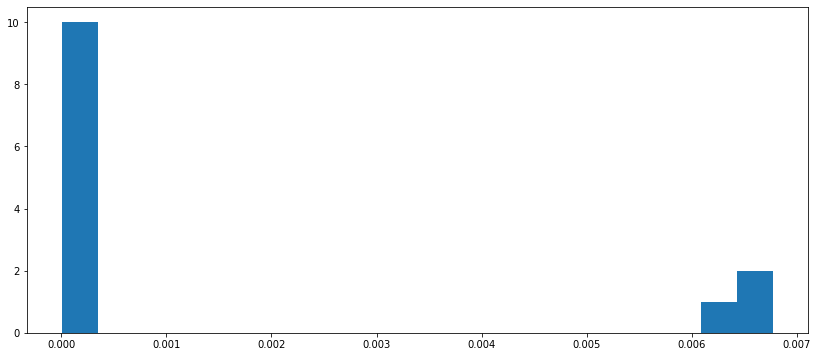

In [14]:
plt.figure(figsize=(14,6))
_ = plt.hist(feats_counts.astype(float)/df.shape[0], bins=20)

In [17]:
mask = (feats_counts.astype(float)/df.shape[0] > 0.006)
df.loc[:, mask]

,item_id,item_price,item_name
3045906,2920,599.0,Disney. LEGO Пираты Карибского моря (Essential...
3046804,1472,2599.0,"Assassin's Creed 3 [Xbox 360, русская версия]"
3047235,1905,249.0,"Bestseller. Grand Theft Auto: San Andreas [PC,..."
3047928,5649,2190.0,PS3: Файтстик Hori Mini 3
3048822,3320,1999.0,"FIFA 13 (с поддержкой PS Move) [PS3, русская в..."
...,...,...,...
39137,15784,299.0,НОЙ
39178,16078,999.0,Настольная игра Гластонбери
39188,10382,699.0,ГЕРАКЛ (BD)
39210,10842,399.0,ДЕЛЬФИН Андрей (фирм.)


In [18]:
df.dtypes

date                   object
date_block_num          int64
shop_id                 int64
item_id                 int64
item_price            float64
item_cnt_day          float64
item_name              object
item_category_id        int64
item_category_name     object
shop_name              object
shop_name_cleaned      object
city                   object
city_id                 int64
dtype: object

In [19]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
num_cols = list(df.select_dtypes(exclude=['object']).columns)

In [20]:
cat_cols

['date',
 'item_name',
 'item_category_name',
 'shop_name',
 'shop_name_cleaned',
 'city']

In [22]:
def hist_it(feat):
    plt.figure(figsize=(16,4))
    feat[Y==0].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.8)
    feat[Y==1].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.5)
    plt.ylim((0,1))

3045906     2
3046804     2
3047235     2
3047928     2
3048822     2
           ..
39137      59
39178      59
39188      59
39210      59
39401      59
Name: shop_id, Length: 3222144, dtype: int64

(array([ 51523.,  38242.,  38179.,  82663.,  58076.,   3412.,   3751.,
             0.,  43792.,  34694.,  17824.,  36979.,  59511.,  52734.,
         22950.,  53227.,  63911.,   1792.,  58133.,  45434.,      0.,
        119990., 186104.,  53910., 105366., 142234.,  49225.,  50860.,
        235636.,   7947.,   5027.,   5752.,  58445.,    306.,  39638.,
         46013.,  13440.,   4257.,  41967., 109253.,  39282.,  39530.,
         35891.,  66321.,  56695.,  21612.,  15849.,  65173.,  44433.,
         43502.,  52921., 143480.,  34769.,  69573., 254570., 196346.]),
 array([ 2.        ,  3.01785714,  4.03571429,  5.05357143,  6.07142857,
         7.08928571,  8.10714286,  9.125     , 10.14285714, 11.16071429,
        12.17857143, 13.19642857, 14.21428571, 15.23214286, 16.25      ,
        17.26785714, 18.28571429, 19.30357143, 20.32142857, 21.33928571,
        22.35714286, 23.375     , 24.39285714, 25.41071429, 26.42857143,
        27.44642857, 28.46428571, 29.48214286, 30.5       , 31.51

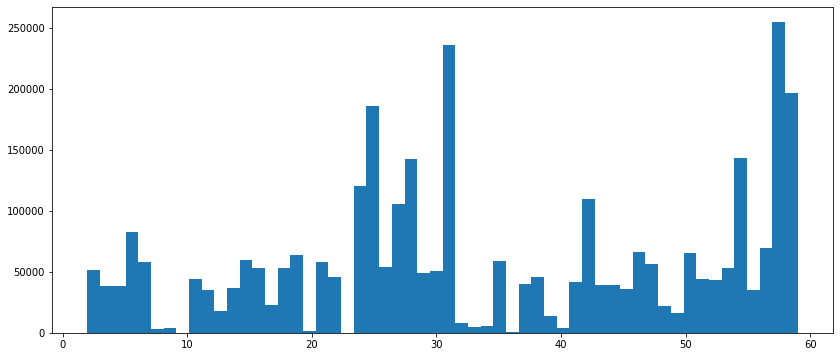

In [32]:
plt.figure(figsize=(14,6))
plt.hist(df.shop_id, bins=56)

In [30]:
df.shop_id.nunique

<bound method IndexOpsMixin.nunique of 3045906     2
3046804     2
3047235     2
3047928     2
3048822     2
           ..
39137      59
39178      59
39188      59
39210      59
39401      59
Name: shop_id, Length: 3222144, dtype: int64>

(array([  25991.,   25532.,   38242.,   38179.,  144151.,    3751.,
          43792.,   34694.,   54803.,   59511.,   52734.,   76177.,
          63911., 1056631.,    5027.,   64197.,   39944.,   46013.,
          59664.,  148535.,   75421.,   66321.,   56695.,   21612.,
         125455.,   96423.,  143480.,   34769.,   69573.,  408808.,
          42108.]),
 array([ 0.        ,  0.96774194,  1.93548387,  2.90322581,  3.87096774,
         4.83870968,  5.80645161,  6.77419355,  7.74193548,  8.70967742,
         9.67741935, 10.64516129, 11.61290323, 12.58064516, 13.5483871 ,
        14.51612903, 15.48387097, 16.4516129 , 17.41935484, 18.38709677,
        19.35483871, 20.32258065, 21.29032258, 22.25806452, 23.22580645,
        24.19354839, 25.16129032, 26.12903226, 27.09677419, 28.06451613,
        29.03225806, 30.        ]),
 <a list of 31 Patch objects>)

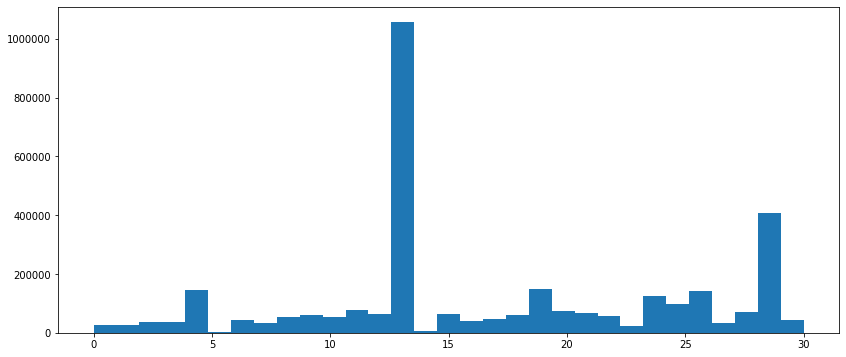

In [33]:
plt.figure(figsize=(14,6))
plt.hist(df.city_id, bins=31)